In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualizatio
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-top-1000-baby-names-18802020/babynames1880-2020.csv


# 1  LOADING THE DATASET

In [2]:
df = pd.read_csv("/kaggle/input/us-top-1000-baby-names-18802020/babynames1880-2020.csv")

# 2 DATA DESCRIPTION

In [3]:
df.head()

,Year,Name,Gender,Births,Rank
0,2020,Liam,M,19659,1
1,2020,Noah,M,18252,2
2,2020,Oliver,M,14147,3
3,2020,Elijah,M,13034,4
4,2020,William,M,12541,5


In [4]:
print("The total number of entries is:", df.size)

The total number of entries is: 1409385


In [5]:
df.shape

(281877, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281877 entries, 0 to 281876
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Year    281877 non-null  int64 
 1   Name    281877 non-null  object
 2   Gender  281877 non-null  object
 3   Births  281877 non-null  int64 
 4   Rank    281877 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 10.8+ MB


In [7]:
df.isnull().sum()

Year      0
Name      0
Gender    0
Births    0
Rank      0
dtype: int64

In [8]:
df.describe()

,Year,Births,Rank
count,281877.000000,281877.000000,281877.000000
mean,1950.030315,1151.069140,500.294621
std,40.685236,3881.234714,288.570729
min,1880.000000,5.000000,1.000000
25%,1915.000000,78.000000,250.000000
50%,1950.000000,234.000000,500.000000
75%,1985.000000,689.000000,750.000000
max,2020.000000,99685.000000,1000.000000


In [9]:
#getting to know the minimum yaer and the maximum year
print(df['Year'].min(), df['Year'].max())

1880 2020


In [10]:
duplicates = df.duplicated().sum()
print(f"the dataset has {duplicates} duplicate values")

the dataset has 0 duplicate values


# 3 EXPLORATORY DATA ANALYSIS (EDA]

**Analyzing the most popular names for each year**

In [11]:
most_popular_names = df.loc[df.groupby("Year")["Births"].idxmax()][["Year", "Name", "Births"]]
most_popular_names.head()

,Year,Name,Births
279935,1880,John,9655
278000,1881,John,8769
276000,1882,John,9557
274000,1883,John,8894
272000,1884,John,9387


**Plotting names popularity over time**

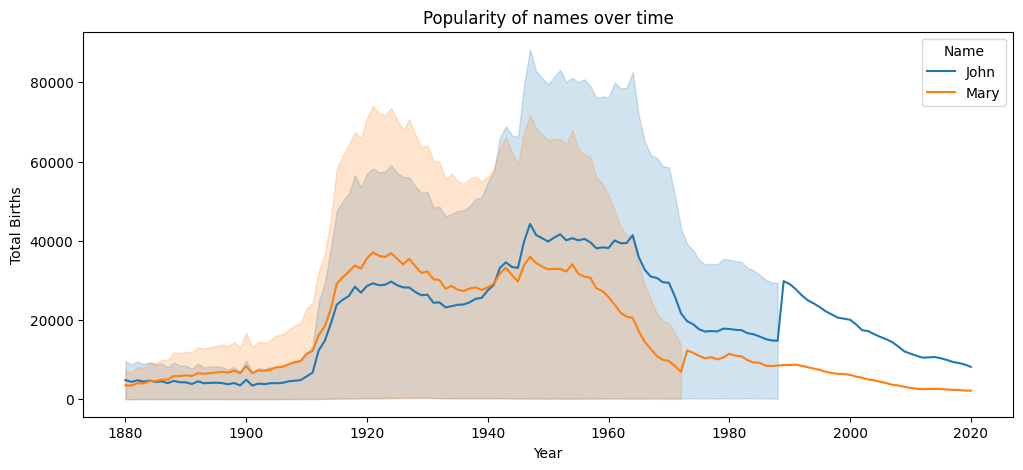

In [12]:
#Filtering the data to get the top names for each gender
names_to_plot = df[df["Name"].isin(["Mary", "John"])]

#Plotting the popularity of each name
plt.figure(figsize=(12, 5))
sns.lineplot(data=names_to_plot, x="Year", y="Births", hue="Name")
plt.title("Popularity of names over time")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.show()

**Analyzing Gender Trends Over Time**

In [13]:
gender_trends = df.groupby(["Year", "Gender"])["Births"].sum().reset_index()
gender_trends.head()

,Year,Gender,Births
0,1880,F,90993
1,1880,M,110201
2,1881,F,91955
3,1881,M,100746
4,1882,F,107710


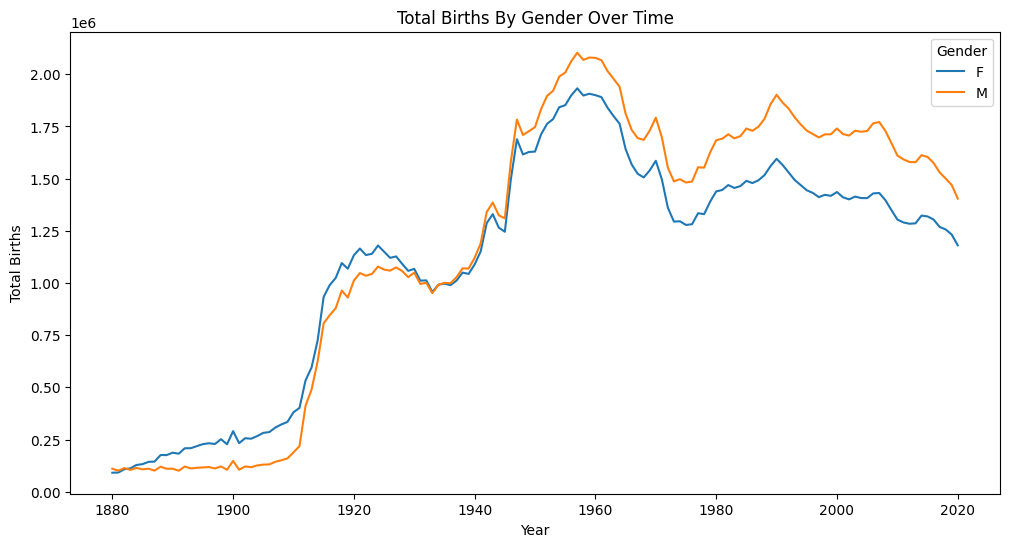

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_trends, x= "Year", y="Births", hue="Gender" )
plt.title("Total Births By Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.show()

**Identifying Top Nmaes By Gender**

In [15]:
df["Decade"] = (df["Year"] // 10) * 10
decade_name_births = df.groupby(["Decade", "Name"])["Births"].sum().reset_index()
top_names_decade = decade_name_births.loc[decade_name_births.groupby("Decade")["Births"].idxmax()]
top_names_decade = top_names_decade[["Decade", "Name", "Births"]]
top_names_decade.head()


,Decade,Name,Births
2026,1880,Mary,92031
4786,1890,Mary,131631
7423,1900,Mary,162192
9862,1910,Mary,480000
12172,1920,Mary,704112


**Analyzing The shift In Name Popularity By Decade**

In [16]:
#Filtering data for specific names
names_to_compare = df[df["Name"].isin(["Mary", "John"])]
name_popularity_decade = names_to_compare.groupby(["Decade", "Name"])["Births"].sum().reset_index()
name_popularity_decade.head()

,Decade,Name,Births
0,1880,John,90395
1,1880,Mary,92031
2,1890,John,81196
3,1890,Mary,131631
4,1900,John,85073


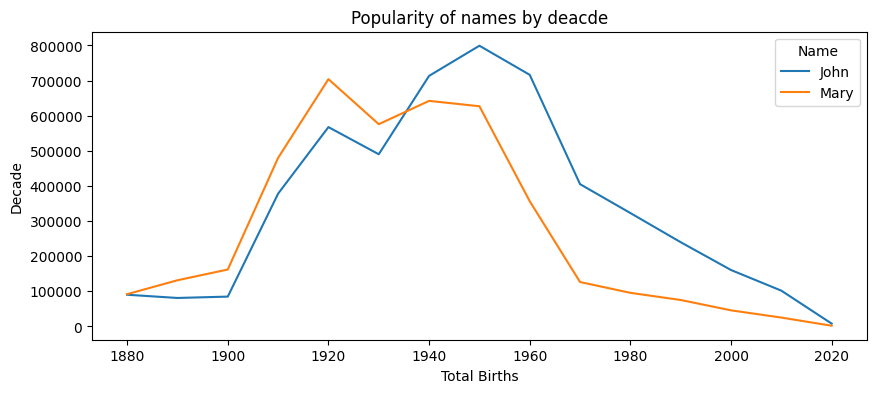

In [17]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=name_popularity_decade, x ="Decade", y= "Births", hue = "Name")
plt.title("Popularity of names by deacde")
plt.ylabel("Decade")
plt.xlabel("Total Births")
plt.show()

**Filtering Genz Data**

In [18]:
gen_z_data=df[(df["Year"]>=1995)& (df["Year"]<=2010)]
genz_population =  gen_z_data["Births"].sum()
gen_z_data.head()

,Year,Name,Gender,Births,Rank,Decade
20000,2010,Jacob,M,22052,1,2010
20001,2010,Ethan,M,17970,2,2010
20002,2010,Michael,M,17272,3,2010
20003,2010,Jayden,M,17120,4,2010
20004,2010,William,M,17009,5,2010


**Analyzing Popular Names For GenZ**

In [19]:
gen_z_popular_names = gen_z_data.groupby("Name")["Births"].sum().reset_index()
gen_z_popular_names = gen_z_popular_names.sort_values("Births", ascending = False)
gen_z_popular_names.head()

,Name,Births
1253,Jacob,464072
2130,Michael,455341
2081,Matthew,393395
1488,Joshua,390545
956,Emily,365756


**Analyzing Trends In Gender Distribution fo Gen z**

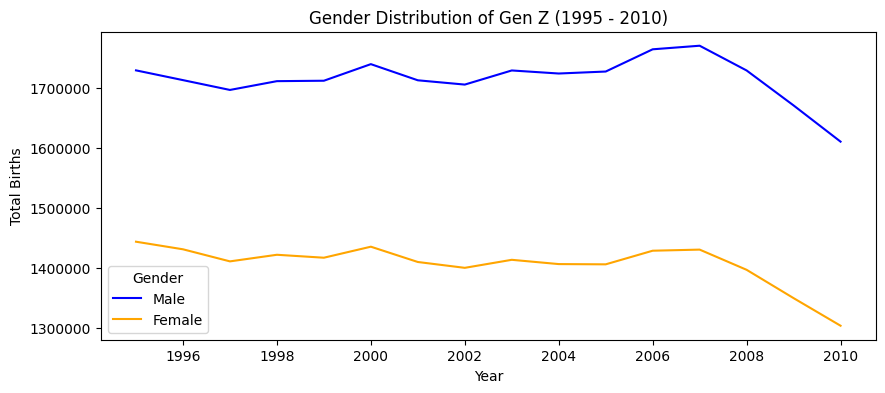

In [20]:
# Create a pivot table to get the total births for each year and gender
gen_z_pivot = gen_z_data.pivot_table(values="Births", index="Year", columns="Gender", aggfunc="sum").reset_index()
plt.figure(figsize=(10, 4))
plt.plot(gen_z_pivot["Year"], gen_z_pivot["M"], label="Male", color="blue")
plt.plot(gen_z_pivot["Year"], gen_z_pivot["F"], label="Female", color="orange")
plt.title("Gender Distribution of Gen Z (1995 - 2010)")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title="Gender")
plt.show()


**Analyzing Total Births of Each Generations**

In [21]:
# Defining Generation Ranges and Filtering the Data for Each Generation
silent_generation = df[(df["Year"] >= 1928) & (df["Year"] <= 1945)]
baby_boomers = df[(df["Year"] >= 1946) & (df["Year"] <= 1964)]
gen_x = df[(df["Year"] >= 1965) & (df["Year"] <= 1980)]
millennials = df[(df["Year"] >= 1981) & (df["Year"] <= 1996)]
gen_z = df[(df["Year"] >= 1997) & (df["Year"] <= 2010)]  # Gen Z starts from 1997

# Calculating total births for each generation
silent_generation_births = silent_generation["Births"].sum()
baby_boomers_births = baby_boomers["Births"].sum()
gen_x_births = gen_x["Births"].sum()
millennials_births = millennials["Births"].sum()
gen_z_births = gen_z["Births"].sum()

# Creating a summary table of total births by generation
births_by_generation = pd.DataFrame({
    "Generation": ["Silent Generation", "Baby Boomers", "Generation X", "Millennials", "Generation Z"],
    "Total Births": [silent_generation_births, baby_boomers_births, gen_x_births, millennials_births, gen_z_births]
})

# Display the summary table
births_by_generation

,Generation,Total Births
0,Silent Generation,39559938
1,Baby Boomers,70437643
2,Generation X,48930189
3,Millennials,52160666
4,Generation Z,43652218


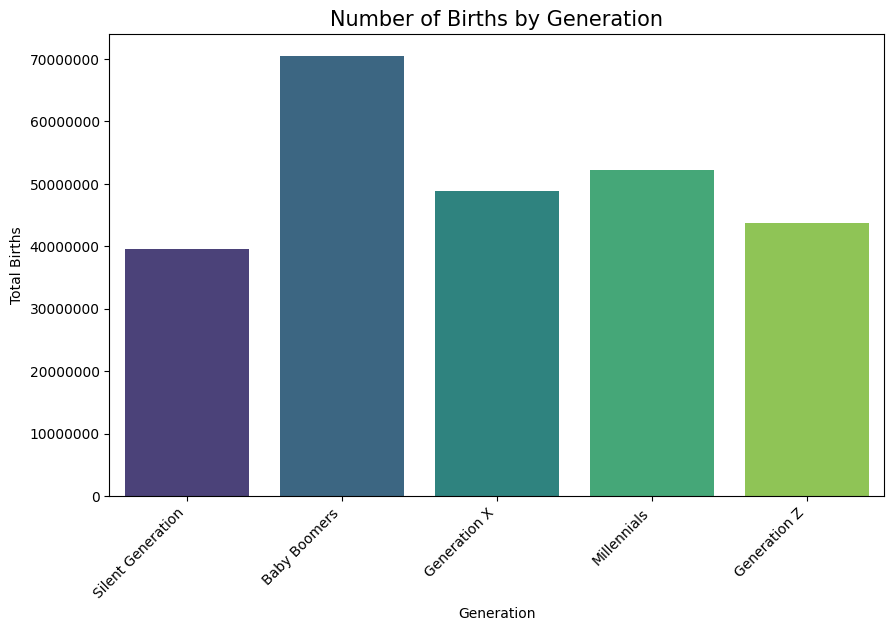

In [22]:
# Plotting the total births for each generation
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.barplot(data=births_by_generation, x="Generation", y="Total Births", palette="viridis")
plt.title("Number of Births by Generation", size=15)
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation on y-axis
plt.xticks(rotation=45, ha="right")  # Rotate x-tick labels for better readability
plt.show()

# Which generation do you belong to, and what is your name?